In [1]:
import matplotlib.pyplot as plt
from tueplots import bundles
from tueplots.constants.color import palettes
import numpy as np
import pandas as pd
import os

def turn_to_np_rgb(hex_color, coloration=1):
    return (np.array( list(bytes.fromhex(hex_color)) )/ 255.0)*coloration

In [2]:
data = []
for root, dirs, files in os.walk('../../dat/creep/'):
    for file in files:
        if file.startswith('random_walk_30min_pause30at30min_'):# and file[-6:-3] in ['_0.', '_1.', '_2.', '_3.', '_4.']:
            print(file)
            df = pd.read_csv(os.path.join(root, file))
            x = df['finestep']
            x = x / np.power(2, 16) * 160
            y = df['c_mean']
            #y = 2 * (y - np.min(y)) / (np.max(y) - np.min(y)) - 1
            # scale to 0-1
            #y = (y - np.min(y)) / (np.max(y) - np.min(y))
            t = df['time']
            data.append((x, y, t))

random_walk_30min_pause30at30min_0.csv
random_walk_30min_pause30at30min_1.csv
random_walk_30min_pause30at30min_10.csv
random_walk_30min_pause30at30min_11.csv
random_walk_30min_pause30at30min_12.csv
random_walk_30min_pause30at30min_13.csv
random_walk_30min_pause30at30min_14.csv
random_walk_30min_pause30at30min_15.csv
random_walk_30min_pause30at30min_2.csv
random_walk_30min_pause30at30min_3.csv
random_walk_30min_pause30at30min_4.csv
random_walk_30min_pause30at30min_5.csv
random_walk_30min_pause30at30min_6.csv
random_walk_30min_pause30at30min_7.csv
random_walk_30min_pause30at30min_8.csv
random_walk_30min_pause30at30min_9.csv


In [3]:
data[0][1].head()

0   -28.2
1   -28.6
2   -30.8
3   -29.8
4   -31.4
Name: c_mean, dtype: float64

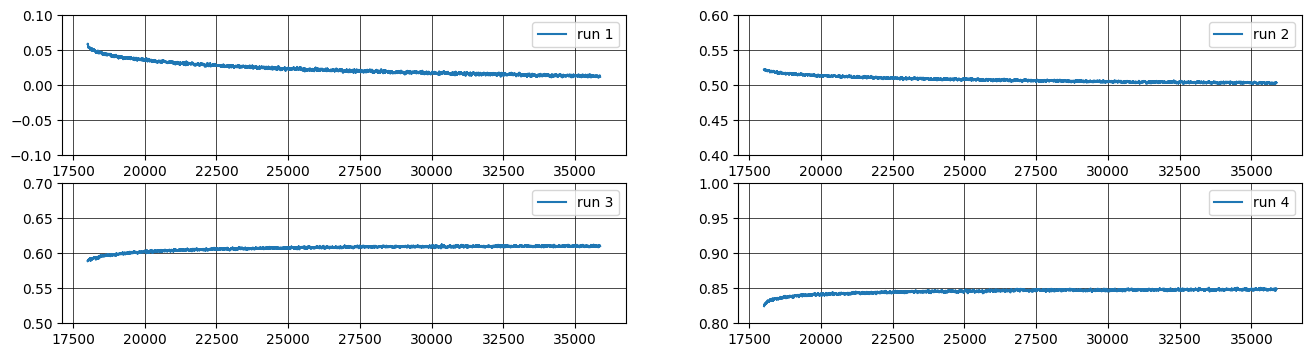

In [4]:
fig, axs = plt.subplots(2, 2, figsize=(16, 4))

# take 2,4,7,8
data_cut = [data[1], data[3], data[6], data[7]]

for i, (x, y, t) in enumerate(data_cut):
    y = (y - np.min(y)) / (np.max(y) - np.min(y))
    axs[i // 2, i % 2].plot(y.iloc[18001:].rolling(window=16).mean(), label=f'run {i + 1}')
    axs[i // 2, i % 2].set_ylim(round(y.iloc[-1] - 0.1, 1), round(y.iloc[-1] + 0.1, 1))

    axs[i // 2, i % 2].grid(which='major', linestyle='-', linewidth='0.5', color='black')
    axs[i // 2, i % 2].grid(which='minor', linestyle=':', linewidth='0.5', color='black')

    #axs[i // 2, i % 2].minorticks_on()
    axs[i // 2, i % 2].legend()
    

plt.show()


C:\Users\David\AppData\Local\Temp\ipykernel_25040\1831182778.py:42: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


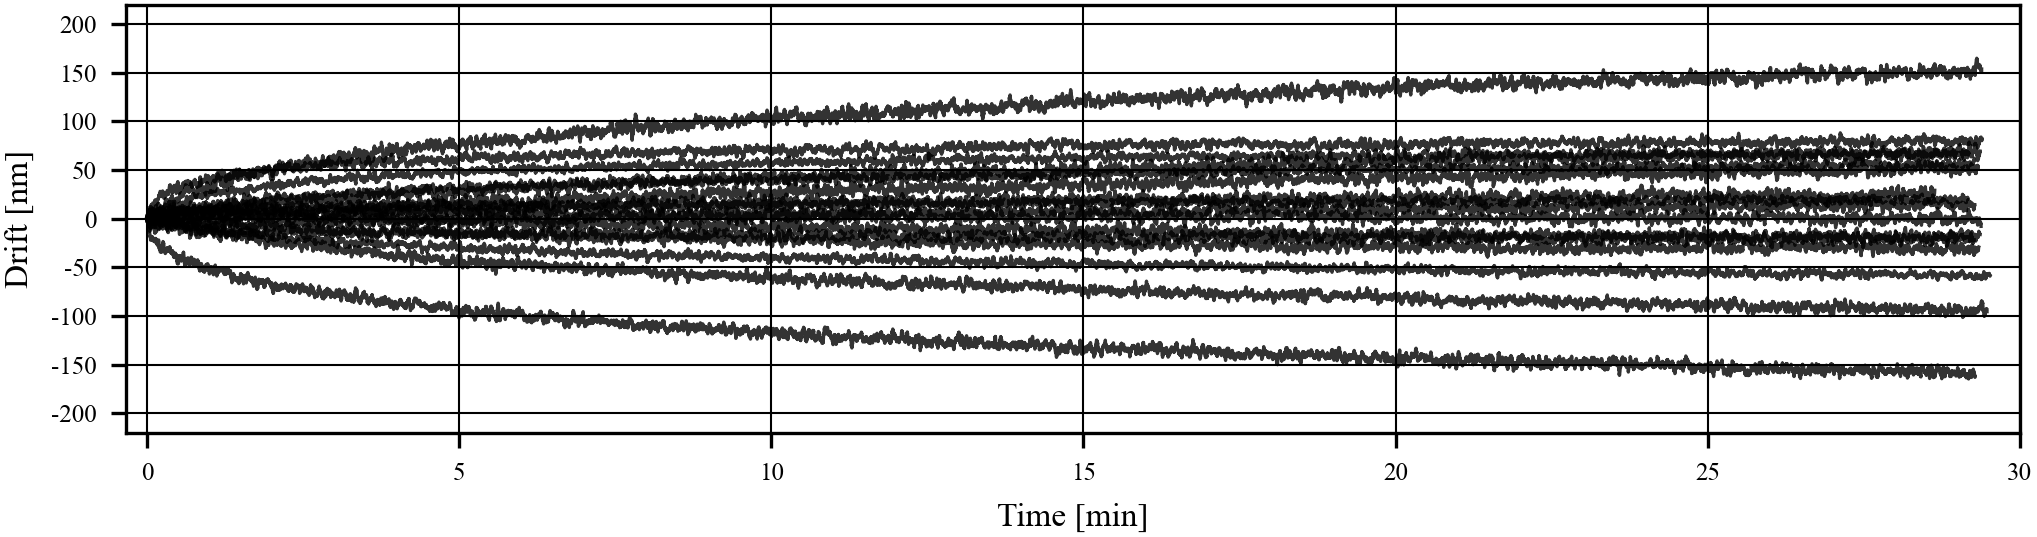

In [5]:
plt.rcParams.update({"figure.dpi": 300})
plt.rcParams.update(bundles.icml2022(column="full", family="serif", usetex=False, nrows=1, ncols=2))
plt.rcParams['font.serif'] = "Times New Roman"

fig, ax = plt.subplots(figsize=(7, 2))

msz = 0.5
lw = .8
alph = .8
alph_fill = 0.5


for i, (x, y, t) in enumerate(data):
    #y = (y - np.min(y)) / (np.max(y) - np.min(y))
    y_mean = y.iloc[18001:].rolling(window=16, center=True, min_periods=1).mean()
    y_mean = y_mean - y_mean.iloc[0]
    y_mean = y_mean * 1.2*np.power(10, 6)/np.power(2, 16) # convert counter to nm
    time = t.iloc[18001:] - t.iloc[18001]
    ax.plot(time, y_mean, color="black", lw=lw, alpha=alph)

ax.grid(which='major', linestyle='-', linewidth='0.5', color='black')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

    #axs[i // 2, i % 2].minorticks_on()
    
#ax.set_ylim(-0.25, 0.25)
# y axis is deviation from start position in percent from -0.1 to 0.1
# ax.set_ylabel('Drift [%]')
# ax.set_ylim(-0.055, 0.055)
# ax.set_yticks(np.arange(-0.05, 0.055, 0.01))
# ax.set_yticklabels([f'{x * 100:.0f}' for x in ax.get_yticks()])
ax.set_ylabel('Drift [nm]')
ax.set_ylim(-220, 220)
ax.set_yticks(np.arange(-200, 210, 50))
ax.set_yticklabels([f'{x:.0f}' for x in ax.get_yticks()])

ax.set_xlabel('Time [min]')
ax.set_xlim(-20, 1800)
ax.set_xticks(np.arange(0, 1801, 300))
ax.set_xticklabels([f'{x // 60:.0f}' for x in np.arange(0, 1801, 300)])

plt.tight_layout()
plt.savefig('fig_creep.pdf')
plt.show()


C:\Users\David\AppData\Local\Temp\ipykernel_25040\1512105602.py:38: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


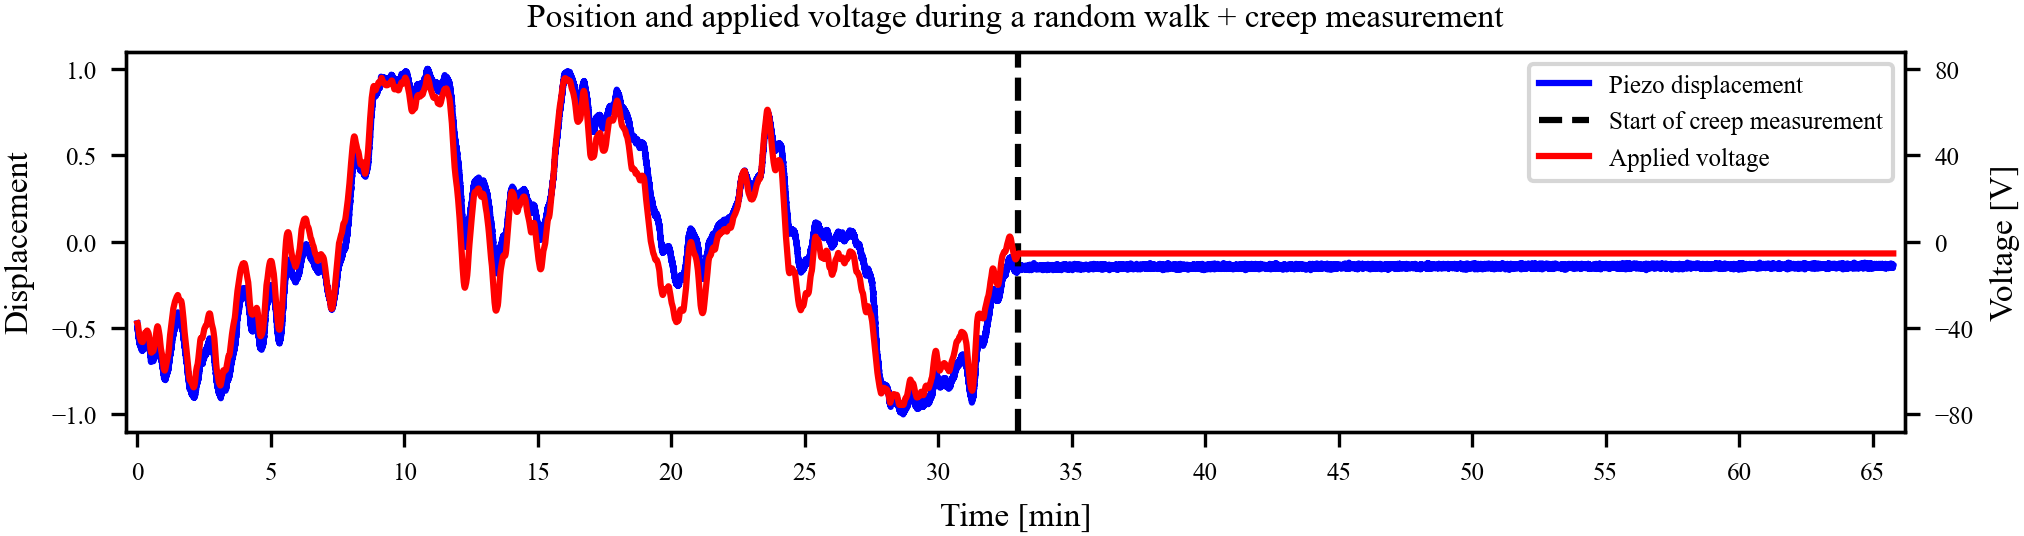

In [7]:
# df_random_walk = pd.read_csv('../../dat/walks/random_walk_180min.csv')
# df_random_walk['c_mean'] = 2 * (df_random_walk['c_mean'] - df_random_walk['c_mean'].min()) / (df_random_walk['c_mean'].max() - df_random_walk['c_mean'].min()) - 1
# df_random_walk['finestep'] = df_random_walk['finestep'] / np.power(2, 16) * 160
# df_random_walk.reset_index(drop=True, inplace=True)

fig, ax = plt.subplots(figsize=(7, 2))

dispalcement = data[0][1]
dispalcement = 2 * (dispalcement - dispalcement.min()) / (dispalcement.max() - dispalcement.min()) - 1

ax.title.set_text('Position and applied voltage during a random walk + creep measurement')
ax.plot(dispalcement, label='Piezo displacement', color='blue')
ax2 = ax.twinx()
ax2.plot(-data[0][0], label='Applied voltage', color='red')

# create an vline for the start of the creep measurement
ax.axvline(x=60*33/0.11, color='black', linestyle='--', label='Start of creep measurement')

minutes_offset = 0
ax.set_ylim(-1.1, 1.1)
ax.set_xlim(60*minutes_offset/0.11-4*60, data[0][1].shape[0]+4*60)
ax.set_xticks(np.arange(60*minutes_offset/0.11, len(dispalcement), 60*5/0.11))
ax.set_xticklabels([f'{x * 0.11 / 60:.0f}' for x in ax2.get_xticks()])

ax2.set_ylim(-88, 88)
ax2.set_yticks([-80, -40, 0, 40, 80])

ax.set_ylabel('Displacement')
ax2.set_ylabel('Voltage [V]')
ax.set_xlabel('Time [min]')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2)


# save the figure
plt.tight_layout()
plt.savefig('./fig_random_walk_creep.pdf')